In [83]:
import pandas as pd
import os
import os.path as path
import wget
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

if not path.exists('Datos'):
    os.mkdir('Datos')
    
file = 'Datos/InterpolacionLagrange.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Archivo descargado')
else:
    print('---Archivo encontrado---')
    Path_ = file

---Archivo encontrado---


In [84]:
Datos = pd.read_csv(Path_,sep=',')
Datos

,X,Y
0,1.4,0.400795
1,3.5,0.594128
2,5.6,0.298028


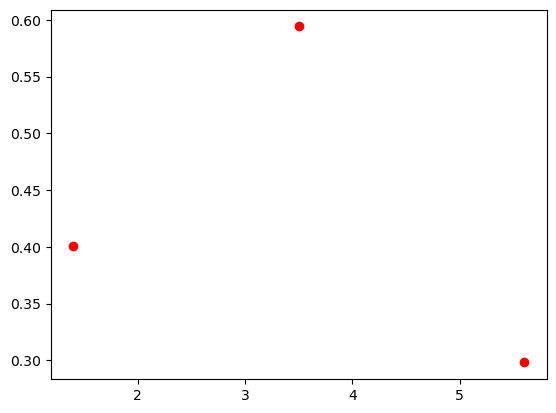

In [85]:
X = np.array(Datos.X)
Y = np.array(Datos.Y)

plt.scatter(X,Y,color='r')

In [86]:
def Coefficientes(i,X,x):
    prod = 1
    for j in range(len(X)):
        if i != j:
            prod *= (x-X[j])/(X[i]-X[j])
    return prod

In [87]:
def Lagrange(X,Y,x):
    L = 0
    for i in range(len(X)):
        L += Coefficientes(i,X,x)*Y[i]
    return L

In [88]:
x = sym.Symbol("x",real=True)
x

x

In [89]:
polinomio = Lagrange(X,Y,x)
f = sym.lambdify(x,polinomio,"numpy")

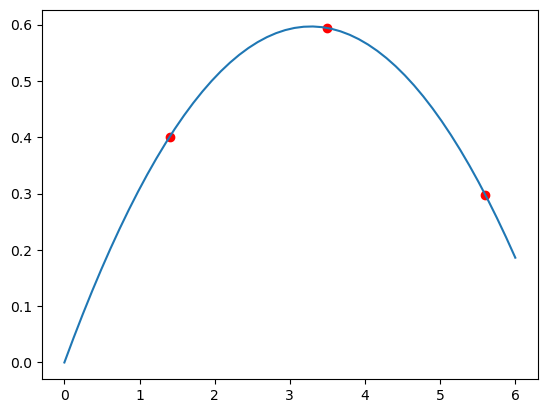

In [92]:
xi = np.linspace(0,6)

polinomio_evaluado = f(xi)

plt.plot(xi,polinomio_evaluado)
plt.scatter(X,Y, color = 'r')
plt.show()

In [ ]:
x = sym.Symbol('x',real = True)
p = sym.simplify(Lagrange(X,Y,x))
p_i = sym.expand(p)

p_i

-0.0554912422401579*x**2 + 0.363970234266202*x

In [ ]:
p_x = sym.diff(p_i)
p_x

0.363970234266202 - 0.110982484480316*x

In [ ]:
original = p.args[1]
derivada = sym.diff(original,x)

original = sym.lambdify(x, original, 'numpy')
derivada = sym.lambdify(x,derivada,'numpy')

coeficiente_lineal = original(0)
coeficiente_cuadratico = derivada(0)

coeficiente_lineal
#coeficiente_cuadratico

0.363970234266202

In [ ]:
coeficiente_cuadratico

-0.0554912422401579

In [ ]:
#ángulo

ángulo_r = np.arctan(coeficiente_lineal)

#ángulo_g = round(np.degrees(ángulo_r))

ángulo_r

0.3490658503988656

In [ ]:
def Velocidad (coeficiente_cuadratico, ángulo_r):
    
    num = -9.8
    dem = (coeficiente_cuadratico)*(2)*((np.cos(ángulo_r))**(2))
    
    v = np.sqrt(num/dem)
    
    return v

In [ ]:
print(Velocidad(-0.055491, 0.34906585))

10.000021825501584
